In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats.stats as scss
import matplotlib.pyplot as plt
%matplotlib inline

# 设置随机数种子，使运行结果可复现
np.random.seed(2046)

In [2]:
# 生成模型数据，其中x1，x2为不相关的特征；x1，x3强相关
n = 2
data = []
for i in range(0, 3):
    for j in range(0, 3):
        data.append({'x1': i, 'x2': j})
data = pd.DataFrame(data * n)
# 生成强相关自特征
data['x3'] = data['x1'] + np.random.random(9 * n)
# 生成被预测值
error = 0.1 * np.random.random(9 * n)
data['y'] = 0.7 * data['x1'] - 1.1 * data['x2'] + 0.3 * data['x3'] + error
data

,x1,x2,x3,y
0,0,0,0.894992,0.297397
1,0,1,0.596078,-0.888134
2,0,2,0.435564,-1.979664
3,1,0,1.153073,1.115046
4,1,1,1.340793,0.064129
5,1,2,1.621597,-0.930433
6,2,0,2.139849,2.060672
7,2,1,2.488654,1.067725
8,2,2,2.049478,-0.115373
9,0,0,0.564523,0.206383


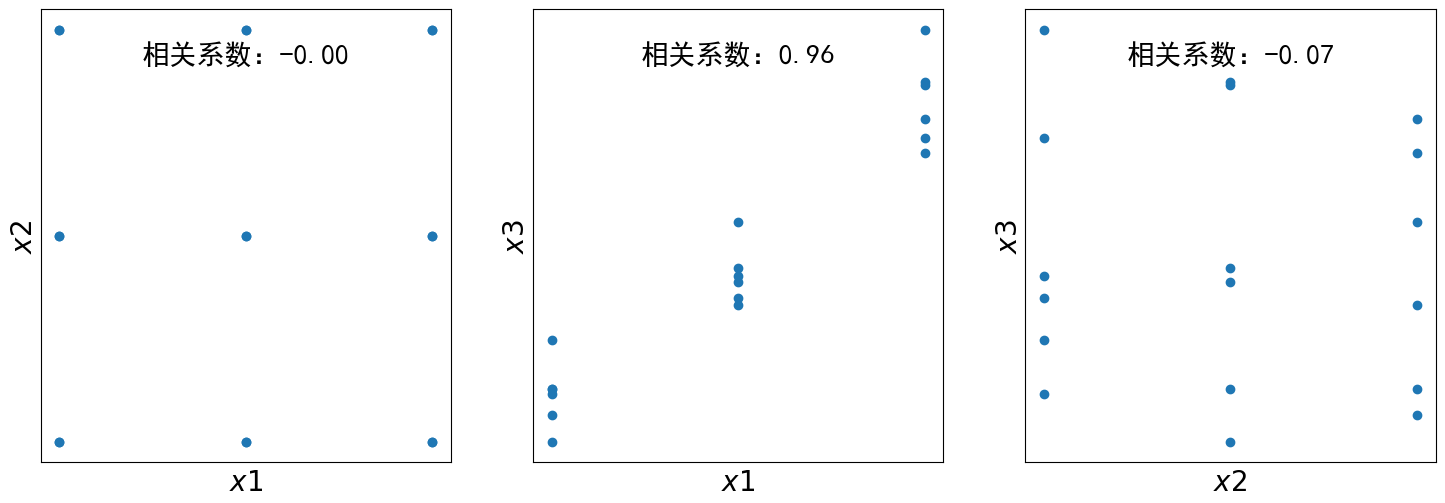

In [3]:
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams["font.sans-serif"] = ["SimHei"]
# 正确显示负号
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 20})
# 创建一个图形框
fig = plt.figure(figsize=(18, 6), dpi=100)
# 计算相关系数
corr = data.corr(method='pearson')
var = [('x1', 'x2'), ('x1', 'x3'), ('x2', 'x3')]
for i, (v1, v2) in enumerate(var):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_xlabel(f'${v1}$')
    ax.set_ylabel(f'${v2}$')
    ax.scatter(data[v1], data[v2])
    ax.annotate(f'相关系数：{corr[v1][v2]:.2f}', (0.5, 0.9),
                xycoords='axes fraction', ha='center', va='center')
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig('multicollinearity_data.png', dpi=200)
plt.show()

In [4]:
def train_model(X, Y):
    '''
    训练线性回归模型
    '''
    model = sm.OLS(Y, X)
    re = model.fit()
    return re

In [5]:
# 用x1搭建回归模型
Y = data['y']
X = sm.add_constant(data['x1'])
re = train_model(X, Y)
print(re.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     12.14
Date:                Tue, 07 Nov 2023   Prob (F-statistic):            0.00307
Time:                        17:46:01   Log-Likelihood:                -23.867
No. Observations:                  18   AIC:                             51.73
Df Residuals:                      16   BIC:                             53.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9094      0.360     -2.525      0.0

/Users/tgbaggio/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
# 用x2搭建回归模型
X1 = sm.add_constant(data['x2'])
re1 = train_model(X1, Y)
print(re1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     20.84
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           0.000318
Time:                        17:46:01   Log-Likelihood:                -21.442
No. Observations:                  18   AIC:                             46.88
Df Residuals:                      16   BIC:                             48.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1755      0.315      3.734      0.0

/Users/tgbaggio/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
# 用不相关的x1，x2搭建回归模型
X2 = sm.add_constant(data[['x1', 'x2']])
re2 = train_model(X2, Y)
print(re2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2488.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.21e-19
Time:                        17:46:01   Log-Likelihood:                 23.319
No. Observations:                  18   AIC:                            -40.64
Df Residuals:                      15   BIC:                            -37.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2036      0.034      5.952      0.0

/Users/tgbaggio/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
# 用强相关的x1，x3搭建模型
Y = data['y']
X = sm.add_constant(data['x1'])
re = train_model(X, Y)
print(re.summary())

/Users/tgbaggio/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     12.14
Date:                Tue, 07 Nov 2023   Prob (F-statistic):            0.00307
Time:                        17:46:01   Log-Likelihood:                -23.867
No. Observations:                  18   AIC:                             51.73
Df Residuals:                      16   BIC:                             53.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9094      0.360     -2.525      0.0

In [9]:
X1 = sm.add_constant(data['x3'])
re1 = train_model(X1, Y)
print(re1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     14.96
Date:                Tue, 07 Nov 2023   Prob (F-statistic):            0.00136
Time:                        17:46:01   Log-Likelihood:                -23.007
No. Observations:                  18   AIC:                             50.01
Df Residuals:                      16   BIC:                             51.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4717      0.452     -3.254      0.0

/Users/tgbaggio/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
X2 = sm.add_constant(data[['x1', 'x3']])
re2 = train_model(X2, Y)
print(re2.summary())

/Users/tgbaggio/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     7.040
Date:                Tue, 07 Nov 2023   Prob (F-statistic):            0.00698
Time:                        17:46:01   Log-Likelihood:                -22.989
No. Observations:                  18   AIC:                             51.98
Df Residuals:                      15   BIC:                             54.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5437      0.622     -2.480      0.0

In [11]:
# 检测多重共线性
print('检测假设x1和x3同时不显著：')
print(re2.f_test(['x1=0', 'x3=0']))
vif = pd.DataFrame()
X = sm.add_constant(data[['x1', 'x2', 'x3']])
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

检测假设x1和x3同时不显著：
<F test: F=7.040116180053257, p=0.006977508919044013, df_denom=15, df_num=2>


,VIF Factor,features
0,11.049590,const
1,12.907932,x1
2,1.061102,x2
3,12.969034,x3


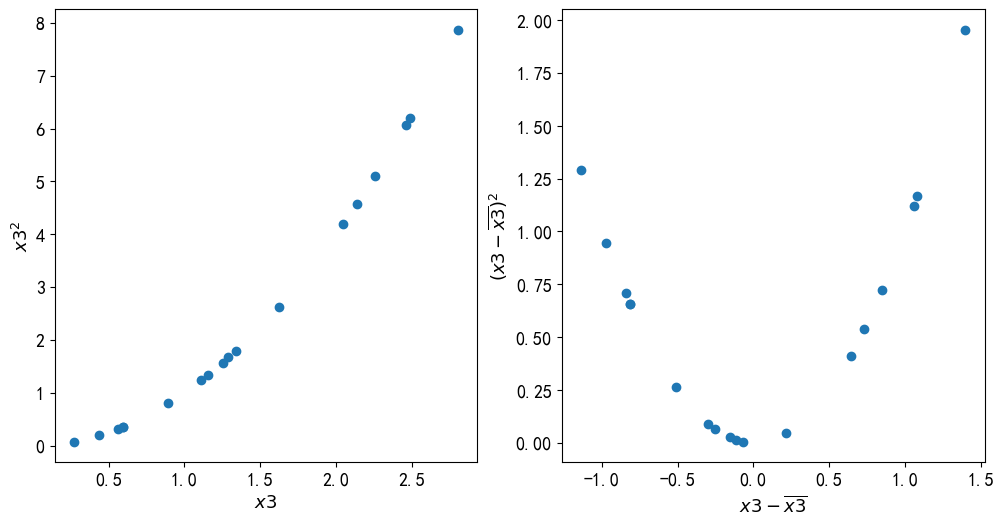

In [12]:
# 将特征的中心重置为0
Y = data['y']
X = data[['x3']]
X2 = X ** 2
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 正确显示负号
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
fig = plt.figure(figsize=(12, 6), dpi=100)
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X, X2)
ax.set_xlabel('$x3$')
ax.set_ylabel('$x3^2$')
ax1 = fig.add_subplot(1, 2, 2)
center_x = X - X.mean()
center_x2 = center_x ** 2
ax1.scatter(center_x, center_x2)
ax1.set_xlabel(r'$x3 - \overline{x3}$')
ax1.set_ylabel(r'$(x3 - \overline{x3})^2$')
plt.savefig('center_data.png', dpi=200)
plt.show()

In [13]:
# 使用未归一化的特征建模
X = pd.concat([X, X2], axis=1, ignore_index=True)
X.columns = ['x3', 'x3_squared']
X = sm.add_constant(X)
re = train_model(X, Y)
print(re.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     7.016
Date:                Tue, 07 Nov 2023   Prob (F-statistic):            0.00706
Time:                        17:46:03   Log-Likelihood:                -23.004
No. Observations:                  18   AIC:                             52.01
Df Residuals:                      15   BIC:                             54.68
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5275      0.877     -1.742      0.1

/Users/tgbaggio/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
# 使用重置之后的特征建模
X = pd.concat([center_x, center_x2], axis=1, ignore_index=True)
X.columns = ['x3_center', 'x3_center_sqaured']
X = sm.add_constant(X)
re1 = train_model(X, Y)
print(re1.summary())

/Users/tgbaggio/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     7.016
Date:                Tue, 07 Nov 2023   Prob (F-statistic):            0.00706
Time:                        17:46:03   Log-Likelihood:                -23.004
No. Observations:                  18   AIC:                             52.01
Df Residuals:                      15   BIC:                             54.68
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0822      0.34